In [1]:
#Conda env: base_conda

#Import packages
#---------------------------------------
import sys
from matplotlib import pyplot as plt
import numpy as np
import json
import pandas as pd
import seaborn as sns
import imblearn


#Import your modules
#---------------------------------------
import plaque_f as pf

# Define paths
#----------------------------------------------------------------------
l_code = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
l_data = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
l_fig = '/Users/dominicburrows/Dropbox/PhD/figures/'

s_code = '/cndd3/dburrows/CODE/'
s_data = '/cndd3/dburrows/DATA/'
s_fig = '/cndd3/dburrows/FIGS/'

%load_ext autoreload
sys.version

'3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:23:11) \n[GCC 9.4.0]'

# Load and pre-process data

In [48]:
def run_(age, dist, long_name, short_name):
    # Declare paths
    data_path = s_data + 'spatial_transcriptomics/plaques/coords/' + age + '/' + long_name + '.json'
    coord_path = '/cndd2/agelber/hal/qc_aligned/' + short_name + '/outs/spatial/tissue_positions.csv'
    genes_path = '/cndd2/agelber/hal/qc_aligned/' + short_name + '/outs/filtered_feature_bc_matrix.h5'
    scale_path = '/cndd2/agelber/hal/qc_aligned/' + short_name + '/outs/spatial/scalefactors_json.json'
    meta = pd.read_csv('/home/AD/agelber/desp1/precast/prec_c25q25g3000/qc_cell_annotation.csv')
    meta_filt = meta[meta['sample'] == short_name]


    spot_df, gene_df = pf.sort_data(data_path, coord_path, genes_path, scale_path, 
                                    meta_filt, min_cell_per_gene=0)#, norm_factor=1e6)
    
    spot_df = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/metadata/' + age + '/' + short_name + '.csv')
    #turn boolean into int
    bool = (spot_df['dist_nearest_plaq'].values < dist).astype(int)
    spot_df['adj_plq'] = bool
    
    #Sanity check
    assert spot_df.shape[0] == gene_df.shape[0] == meta_filt.shape[0]
    assert 'Thy1' not in gene_df.columns.values or 'humanAPP' not in gene_df.columns.values
    print('Number of spots: ' + str(gene_df.shape[0]))
    print('Number of genes: ' + str(gene_df.shape[1]))
    return(spot_df, gene_df)

In [4]:
#OLD ANIMALS
#sort out names
import glob
import os
age = 'old'
os.chdir('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/coords/' + age)
og = glob.glob('*.json')
ID = [i.split('.')[0] for i in og]
sub_ID=[]
for x,i in enumerate(og):
    if x != 1: sub_ID = np.append(sub_ID, i.split('_')[1][:-5])
    else: sub_ID = np.append(sub_ID, i[:-5])
ID, sub_ID



(['V11Y10_030-C',
  '030-B',
  'V11Y17_109-D',
  'V11Y17_109-A',
  'V10S15_040-C',
  'V11Y17_109-C',
  'S29_030-D',
  'V10S15_040-A',
  'V10S15_040-D'],
 array(['030-C', '030-B', '109-D', '109-A', '040-C', '109-C', '030-D',
        '040-A', '040-D'], dtype='<U32'))

In [49]:
#DIST = 150
dist = 150
spot_df, gene_df = run_('old', dist, ID[0], sub_ID[0])

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


In [50]:
spot_df

,Unnamed: 0,barcode,sample,sex,plaque,cluster,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres,micron_x,micron_y,dist_nearest_plaq,dam_scr,adj_plq
0,111351,AAACAAGTATCTCCCA-1_030-C,030-C,F,0,GP/TH,50,102,413,1642,7640.215638,1921.686394,2813.133952,-1.303905,0
1,111352,AAACAATCTACTAGCA-1_030-C,030-C,F,0,CA1,3,43,1049,764,3554.887179,4880.990380,1155.639155,-0.761353,0
2,111353,AAACAGAGCGACTCCT-1_030-C,030-C,F,0,CA3-sp,14,94,500,969,4508.750885,2326.496845,3335.466323,1.198699,0
3,111354,AAACAGTGTTCCTGGG-1_030-C,030-C,F,0,Cortex Layer 2/3,73,43,1046,2073,9645.655919,4867.031399,361.977789,1.716606,0
4,111355,AAACCCGAACGAAATC-1_030-C,030-C,F,0,Amygdala,45,115,273,1548,7202.834232,1270.267277,3555.739719,0.967294,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3392,114743,TTGTTTCACATCCAGG-1_030-C,030-C,F,0,Cortex Layer 5b,58,42,1057,1793,8342.817685,4918.214330,98.155009,0.898491,1
3393,114744,TTGTTTCATTAGTCTA-1_030-C,030-C,F,0,Cortex Layer 2/3,60,30,1186,1830,8514.978452,5518.450516,97.823590,3.975057,1
3394,114745,TTGTTTCCATACAACT-1_030-C,030-C,F,0,Cortex Layer 4,45,27,1219,1550,7212.140219,5671.999308,705.415942,1.810155,0
3395,114746,TTGTTTGTATTACACG-1_030-C,030-C,F,0,Cortex Layer 2/3,73,41,1067,2073,9645.655919,4964.744267,302.444590,-0.445870,0


In [53]:
#Define colormap by clusters
col_df = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/metadata/colors.csv')
sort_clust = col_df['cluster_order'] #all clusters sorted 
sort_col = col_df['color']


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


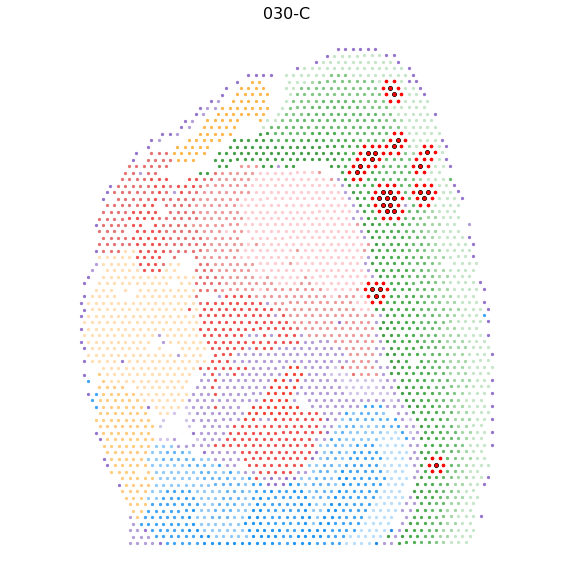

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2835
Number of genes: 32284


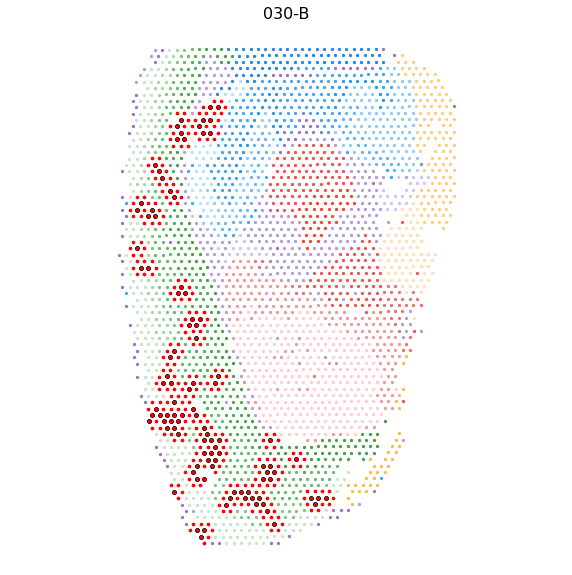

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2959
Number of genes: 32284


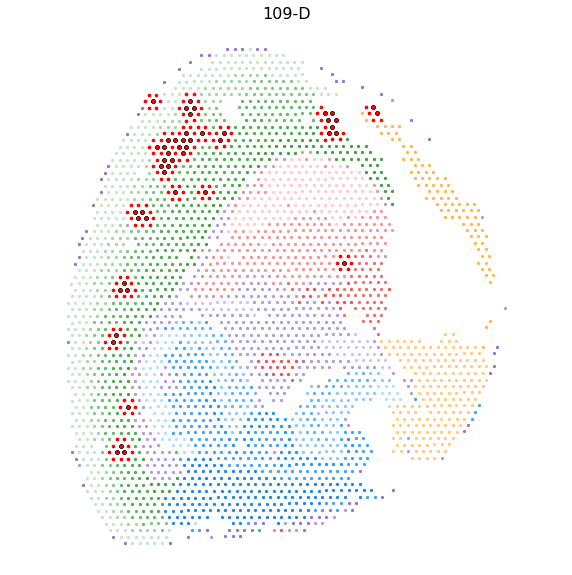

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3204
Number of genes: 32284


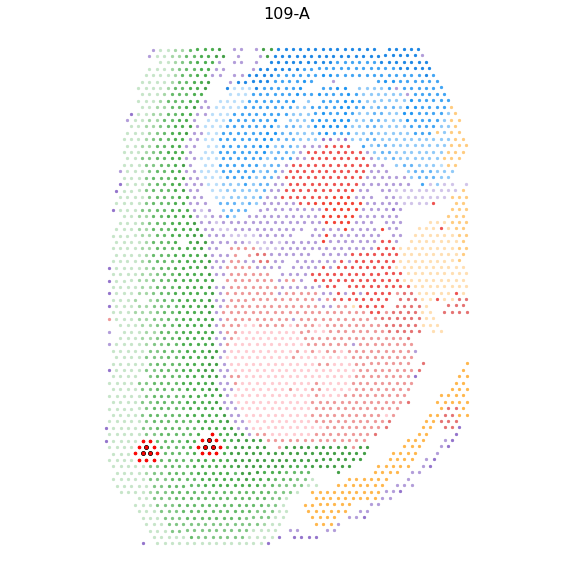

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3406
Number of genes: 32284


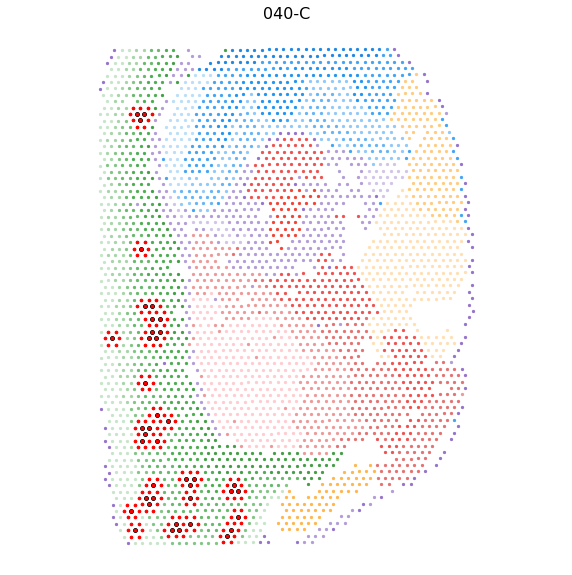

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3002
Number of genes: 32284


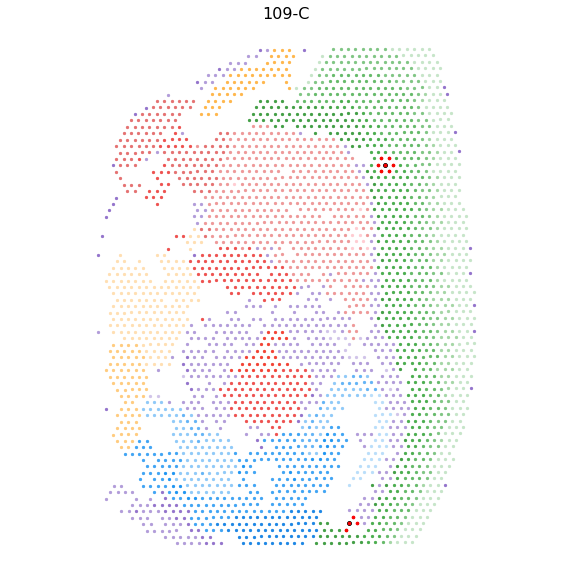

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


Number of spots: 2998
Number of genes: 32284


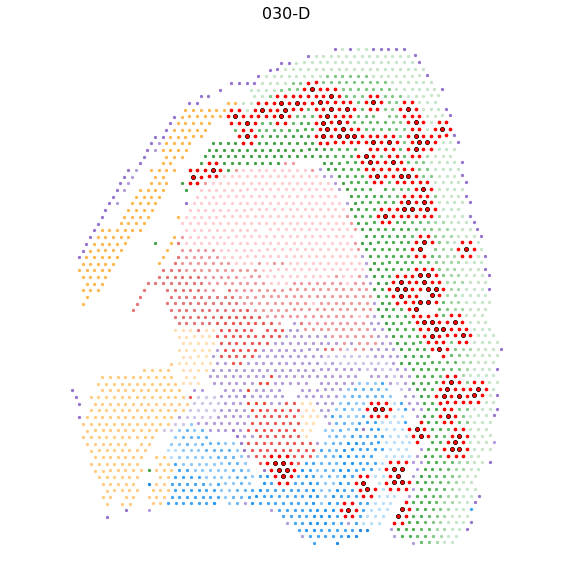

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3343
Number of genes: 32284


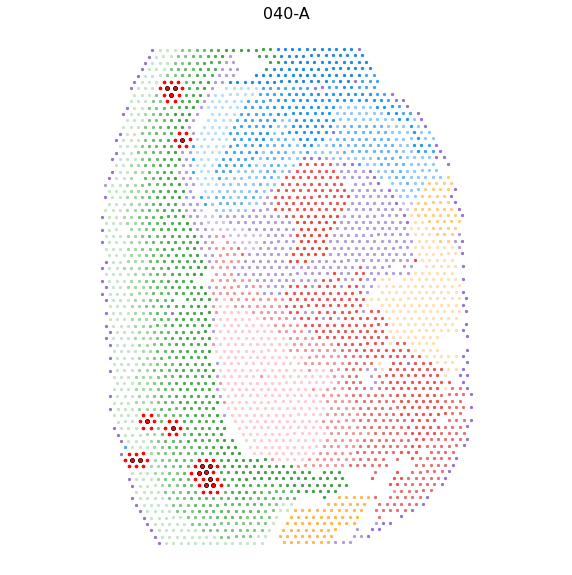

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3285
Number of genes: 32284


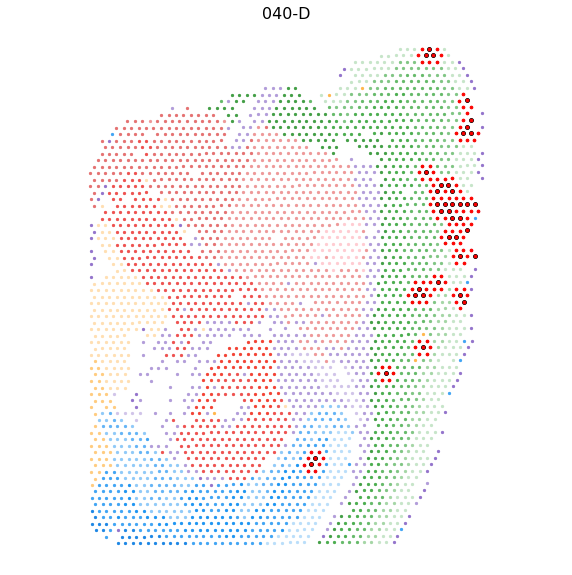

In [58]:
#visualise plaque + adjacent spots
for y,name in enumerate(sub_ID):
    spot_df, gene_df = run_('old', dist, ID[y], sub_ID[y])
    clust_lab = spot_df['cluster'].values
    xcoord, ycoord = spot_df['pxl_row_in_fullres'].values, spot_df['pxl_col_in_fullres'].values
    plq_bool = spot_df['plaque'].values == 1
    adj_bool = spot_df['adj_plq'].values == 1


    fig,ax = plt.subplots(figsize=(10,10))
    for x in range(len(sort_clust)): 
        plt.scatter(xcoord[np.where(clust_lab==sort_clust[x])[0]], ycoord[np.where(clust_lab==sort_clust[x])[0]], s=5, label = sort_clust[x], color = sort_col[x], alpha=1)
    plt.scatter(xcoord[plq_bool], ycoord[plq_bool], s=15, c='k')
    plt.scatter(xcoord[adj_bool], ycoord[adj_bool], s=7, c='r')

    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, markerscale=2)

    #remove all borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.axis('equal')
    plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    plt.title(sub_ID[y], fontsize=16)
    plt.show()

In [52]:
#Do DE in MAST to find genes to use for prediction
#---------------------------------------------------

#Do I need to model random effect? maybe learning will be better if I have more genes -> probably dont model random effect? 

In [8]:
gene_df

,Xkr4,Gm1992,Gm19938,Gm37381,Rp1,Sox17,Gm37587,Gm37323,Mrpl15,Lypla1,...,Gm16367,AC163611.1,AC163611.2,AC140365.1,AC124606.2,AC124606.1,AC133095.2,AC133095.1,AC234645.1,AC149090.1
AAACAAGTATCTCCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,156.519012,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
AAACAATCTACTAGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.998596,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.998596
AAACAGAGCGACTCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.007980,42.007980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.015961
AAACAGTGTTCCTGGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.047729,45.523865,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.143188
AAACCCGAACGAAATC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170.852554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,481.058350
TTGTTTCATTAGTCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.862553,46.862553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,234.312759
TTGTTTCCATACAACT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.544220
TTGTTTGTATTACACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.246506,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.493011


In [9]:
#add in plaque adjacent spots to metadata
spot_df

,barcode,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres,micron_x,micron_y,plaque,cluster
111351,AAACAAGTATCTCCCA-1,1,50,102,413,1642,7640.215638,1921.686394,0,GP/TH
111352,AAACAATCTACTAGCA-1,1,3,43,1049,764,3554.887179,4880.99038,0,CA1
111353,AAACAGAGCGACTCCT-1,1,14,94,500,969,4508.750885,2326.496845,0,CA3-sp
111354,AAACAGTGTTCCTGGG-1,1,73,43,1046,2073,9645.655919,4867.031399,0,Cortex Layer 2/3
111355,AAACCCGAACGAAATC-1,1,45,115,273,1548,7202.834232,1270.267277,0,Amygdala
...,...,...,...,...,...,...,...,...,...,...
114743,TTGTTTCACATCCAGG-1,1,58,42,1057,1793,8342.817685,4918.21433,0,Cortex Layer 5b
114744,TTGTTTCATTAGTCTA-1,1,60,30,1186,1830,8514.978452,5518.450516,0,Cortex Layer 2/3
114745,TTGTTTCCATACAACT-1,1,45,27,1219,1550,7212.140219,5671.999308,0,Cortex Layer 4
114746,TTGTTTGTATTACACG-1,1,73,41,1067,2073,9645.655919,4964.744267,0,Cortex Layer 2/3


In [ ]:
spot_df[]

In [10]:
#group all data together
name_l = '030-B', '030-C', '040-A', '040-C', '040-D'

for name in name_l:
    spot_df, gene_df = run_(name)
    if name == name_l[0]: 
        gene_all = gene_df
        lab = spot_df['plaque']
    else: 
        gene_all = np.vstack((gene_all, np.asarray(gene_df)))
        lab = np.hstack((lab, spot_df['plaque']))

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2939
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3532
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3465
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3616
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3457
Number of genes: 32284


In [11]:
gene_all.shape, lab.shape

((17009, 32284), (17009,))

In [12]:
#Ascertain class imbalance
u = np.unique(lab,return_counts=True)
print(str(np.round(u[1][1]/sum(u[1]) * 100)) + '% of spots are plaque')

1.0% of spots are plaque


# Build classifier



In [14]:
# classify plaque or no plaque spots based gene expression
#----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(gene_all, lab, test_size=0.33)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11396, 32284), (5613, 32284), (11396,), (5613,))

In [170]:
#Random under sampling 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X_train, y_train)
print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape: Counter({0: 11269, 1: 127})
Resample dataset shape Counter({0: 127, 1: 127})


In [185]:
#Fit model and predict
clf = LogisticRegression(max_iter=1000, penalty='l2').fit(x_rus, y_rus)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)
true = y_test
pf.report_metrics(true, pred, pred_prob)

TOTAL ACCURACY (#correct predictions/#total predictions) = 0.758 , 4257 of 5613
ACCURACY (#correct predictions/#total predictions) non-plaque = 0.757 , 4210 of 5562
ACCURACY (#correct predictions/#total predictions) plaque = 0.92 , 47 of 51
PRECISION (TP/TP+FP) non-plaque = 0.999
PRECISION (TP/TP+FP) plaque= 0.034
RECALL (TP/TP+FN) Non-plaque = 0.757
RECALL (TP/TP+FN) plaque = 0.922
F1 SCORE(2*(PR/P+R)) non-plaque = 0.861
F1 SCORE (2*(PR/P+R)) plaque = 0.065
TRUE POSITIVE RATE (TP/TP+FN) non-plaque = 0.757
TRUE POSITIVE RATE (TP/TP+FN) plaque = 0.922
FALSE POSITIVE RATE (FP/FP+TN) non-plaque  = 0.078
FALSE POSITIVE RATE (FP/FP+TN) plaque = 0.243
ROC AUC non-plaque = 0.914
ROC AUC plaque = 0.914


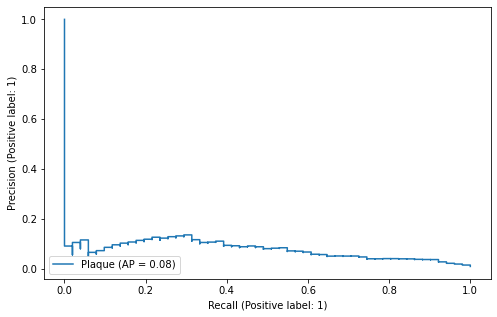

In [172]:
from sklearn.metrics import PrecisionRecallDisplay
fig, ax = plt.subplots(figsize=(8, 5))
PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="Plaque", pos_label=1, ax=ax)
plt.show()

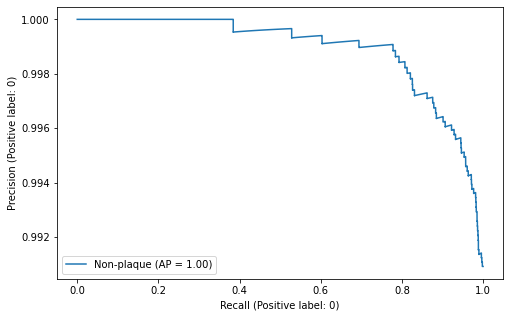

In [174]:
from sklearn.metrics import PrecisionRecallDisplay
fig, ax = plt.subplots(figsize=(8, 5))
PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="Non-plaque", pos_label=0, ax=ax)
plt.show()

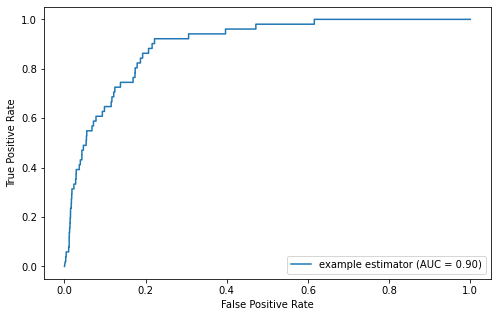

In [175]:
fpr, tpr, thresholds = metrics.roc_curve(true, pred_prob[:,1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
#set display size
plt.rcParams["figure.figsize"] = (8,5)
display.plot()
plt.show()

In [15]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(gene_all, lab, test_size=0.33)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11396, 32284), (5613, 32284), (11396,), (5613,))

In [226]:
# combine over and undersampling 
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

ros = SMOTE(sampling_strategy=0.05)# fit predictor and target variable
rus = RandomUnderSampler(replacement=False)# fit predictor and target variable
pipeline = Pipeline(steps=[('ros', ros), ('rus', rus)])
X_mix, y_mix = pipeline.fit_resample(X_train, y_train)
print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_mix))

#mix_pred = pipeline.predict(X_test)

Original dataset shape: Counter({0: 11271, 1: 125})
Resample dataset shape Counter({0: 563, 1: 563})


In [227]:
#Fit model and predict
clf = LogisticRegression(max_iter=1000, penalty='l2').fit(X_mix, y_mix)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)
true = y_test
pf.report_metrics(true, pred, pred_prob)

TOTAL ACCURACY (#correct predictions/#total predictions) = 0.93 , 5220 of 5613
ACCURACY (#correct predictions/#total predictions) non-plaque = 0.933 , 5187 of 5560
ACCURACY (#correct predictions/#total predictions) plaque = 0.62 , 33 of 53
PRECISION (TP/TP+FP) non-plaque = 0.996
PRECISION (TP/TP+FP) plaque= 0.081
RECALL (TP/TP+FN) Non-plaque = 0.933
RECALL (TP/TP+FN) plaque = 0.623
F1 SCORE(2*(PR/P+R)) non-plaque = 0.963
F1 SCORE (2*(PR/P+R)) plaque = 0.144
TRUE POSITIVE RATE (TP/TP+FN) non-plaque = 0.933
TRUE POSITIVE RATE (TP/TP+FN) plaque = 0.623
FALSE POSITIVE RATE (FP/FP+TN) non-plaque  = 0.377
FALSE POSITIVE RATE (FP/FP+TN) plaque = 0.067
ROC AUC non-plaque = 0.91
ROC AUC plaque = 0.91


In [224]:
#Fit model and predict
clf = LogisticRegression(max_iter=1000, penalty='l2').fit(X_mix, y_mix)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)
true = y_test
pf.report_metrics(true, pred, pred_prob)

TOTAL ACCURACY (#correct predictions/#total predictions) = 0.963 , 5405 of 5613
ACCURACY (#correct predictions/#total predictions) non-plaque = 0.969 , 5385 of 5560
ACCURACY (#correct predictions/#total predictions) plaque = 0.38 , 20 of 53
PRECISION (TP/TP+FP) non-plaque = 0.994
PRECISION (TP/TP+FP) plaque= 0.103
RECALL (TP/TP+FN) Non-plaque = 0.969
RECALL (TP/TP+FN) plaque = 0.377
F1 SCORE(2*(PR/P+R)) non-plaque = 0.981
F1 SCORE (2*(PR/P+R)) plaque = 0.161
TRUE POSITIVE RATE (TP/TP+FN) non-plaque = 0.969
TRUE POSITIVE RATE (TP/TP+FN) plaque = 0.377
FALSE POSITIVE RATE (FP/FP+TN) non-plaque  = 0.623
FALSE POSITIVE RATE (FP/FP+TN) plaque = 0.031
ROC AUC non-plaque = 0.912
ROC AUC plaque = 0.912


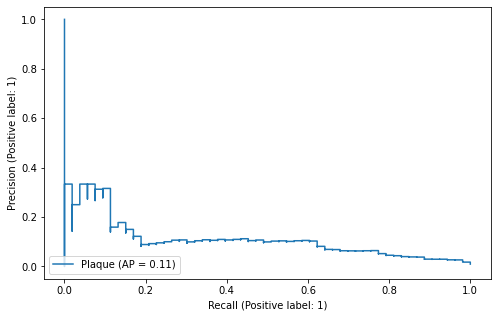

In [228]:
from sklearn.metrics import PrecisionRecallDisplay
fig, ax = plt.subplots(figsize=(8, 5))
PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="Plaque", pos_label=1, ax=ax)
plt.show()

In [ ]:

#Check top n DE genes -> 100? 
gene_all

In [ ]:
# Splitting -> cross validation -> tune some hyperparameters


In [ ]:
# Try out a different model? 

In [151]:
#Fit model and predict
clf = LogisticRegression(max_iter=1000, penalty='l2').fit(x_rus, y_rus)
pred = clf.predict(X_test)
true = y_test
report_class_acc(true, pred)

Non-plaque accuracy = 0.744 , 4127 of 5545
Plaque accuracy = 0.93 , 63 of 68


In [138]:
accuracy = sklearn.metrics.balanced_accuracy_score(true, pred)
accuracy

0.8353723545324352

In [51]:
#find the top n PCs of gene data
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(gene_all)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

8


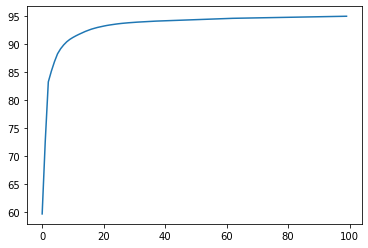

In [52]:
minpc = np.where(var1 > 90)[0][0]
print(minpc)
plt.plot(var1)
plt.show()

In [29]:
lab.shape, gene_all.shape

((17009,), (17009, 32284))

In [110]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
X_sc = scaler.fit_transform(gene_all)

#find the top n PCs of gene data
pca = PCA(n_components=8)
pca.fit(X_sc)
X_pc = pca.transform(X_sc)


In [111]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_pc, lab, test_size=0.33, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11396, 8), (11396,), (5613, 8), (5613,))

In [112]:
#Random under sampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X_train, y_train)
print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape: Counter({0: 11273, 1: 123})
Resample dataset shape Counter({0: 123, 1: 123})


In [114]:
#Fit model and predict
clf = LogisticRegression(max_iter=1000, penalty='l2').fit(x_rus, y_rus)
pred = clf.predict(X_test)
true = y_test
report_class_acc(true, pred)

Non-plaque accuracy = 0.706 , 3923 of 5558
Plaque accuracy = 0.87 , 48 of 55


In [67]:
sum(true[np.where(true==1)] == pred[np.where(true==1)]) 

3

In [41]:
np.unique(true)

array([0, 1])

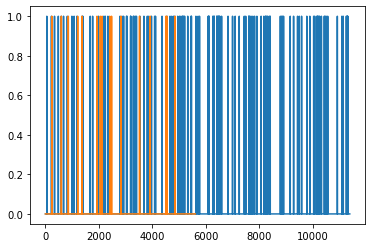

In [49]:
plt.plot(y_train)
plt.plot(pred)